<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/deep-learning/computer-vision/finger_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow import keras
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [18]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

In [4]:
!kaggle datasets download -d koryakinp/fingers

 97% 353M/363M [00:10<00:00, 64.9MB/s]
100% 363M/363M [00:10<00:00, 37.2MB/s]


In [ ]:
!unzip fingers.zip

In [6]:
os.getcwd()
print(os.name)
os.listdir()

posix


['.config',
 'fingers',
 'test',
 'train',
 'kaggle.json',
 'fingers.zip',
 'sample_data']

In [7]:
train_set_path = []
train_set_label = []

train_base = "../content/fingers/train/"

for filename in os.listdir(train_base):
    
    train_set_label.append(filename.split('.')[0][-2:])
    train_set_path.append(train_base+filename)
    

print("Number of training set examples: ", len(train_set_path))

test_set_path = []
test_set_label = []

test_base = "../content/fingers/test/"

for filename in os.listdir(test_base):
    
    test_set_label.append(filename.split('.')[0][-2:])
    test_set_path.append(test_base+filename)
    

print("Number of test set examples: ", len(test_set_path))

Number of training set examples:  18000
Number of test set examples:  3600


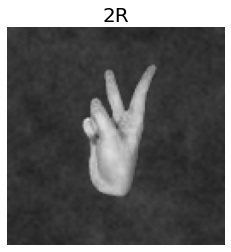

In [8]:
# checking train path
x=0
image = cv2.imread(train_set_path[x]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(train_set_label[x], fontsize = 20)
plt.axis('off')
plt.show()

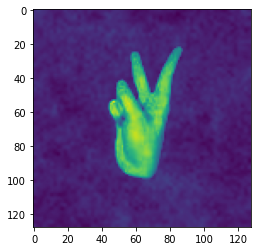

In [9]:
im = Image.open(train_set_path[x])
plt.imshow(im);

In [10]:
X_train = []
X_test = []

# reading images for train data
for path in train_set_path:
    
    image = cv2.imread(path)
    # try:        
    #   image =  cv2.resize(image, (64,64))    
    # except:
    #   break
    X_train.append(image)
    
# reading images for test data
for path in test_set_path:
    
    image = cv2.imread(path)        
    # try:   
    #   image =  cv2.resize(image, (64,64))
    # except:
    #   break  
    X_test.append(image)

X_test = np.array(X_test)
X_train = np.array(X_train)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(np.array(train_set_label).shape)

(18000, 128, 128, 3)
(3600, 128, 128, 3)
(18000,)


In [12]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(train_set_label)
y_test = label_encoder.fit_transform(test_set_label)

if len(np.unique(y_train)) == len(np.unique(y_test)):
  print("Number of classes: ", len(np.unique(y_train)))
  num_classes = len(np.unique(y_train))


Number of classes:  12


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
print("Categorical values for y_train:\n", y_train.shape)
# df = pd.DataFrame(y_train) 
# df

Categorical values for y_train:
 (18000, 12)


In [37]:
def happyModel():
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=3, input_shape=(128,128,3)),
            tfl.Conv2D(filters =32, kernel_size=7, strides=1),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(units=12,activation="softmax")
        ])
    
    return model

In [38]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
happy_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 134, 134, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      4736      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

In [ ]:
happy_model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
282/282 [==============================] - 441s 2s/step - loss: 1.0450 - accuracy: 0.9547
Epoch 2/10
282/282 [==============================] - 439s 2s/step - loss: 0.0804 - accuracy: 0.9908
Epoch 3/10
282/282 [==============================] - 440s 2s/step - loss: 0.0506 - accuracy: 0.9944
Epoch 4/10
282/282 [==============================] - 440s 2s/step - loss: 0.0057 - accuracy: 0.9992
Epoch 5/10
282/282 [==============================] - 438s 2s/step - loss: 5.1174e-07 - accuracy: 1.0000
Epoch 6/10
282/282 [==============================] - 440s 2s/step - loss: 3.1884e-07 - accuracy: 1.0000
Epoch 7/10
282/282 [==============================] - 436s 2s/step - loss: 2.3856e-07 - accuracy: 1.0000
Epoch 8/10
124/282 [============>.................] - ETA: 4:06 - loss: 1.2849e-07 - accuracy: 1.0000

In [28]:
happy_model.evaluate(X_test, y_test)

ValueError: ignored